<a href="https://colab.research.google.com/github/DhanuEdu/DATA-ANALYST-TRAINING--UNIFIED-MENTOR/blob/main/e_com_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Load the dataset

import pandas as pd
from google.colab import files


uploaded = files.upload()
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')


Saving ecommerce_furniture_dataset_2024.csv to ecommerce_furniture_dataset_2024.csv


In [3]:
# 2 DATA PREPROCESSING
# removing '$' and converting to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

if 'originalPrice' in df.columns:
    df.loc[:, 'originalPrice'] = df['originalPrice'].replace('[\$,]', '', regex=True).astype(float)
    df.loc[:, 'originalPrice'] = df['originalPrice'].fillna(df['originalPrice'].median())

df['discount_percentage'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100


<ipython-input-3-f3b62fa21f82>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'originalPrice'] = df['originalPrice'].fillna(df['originalPrice'].median())


In [4]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Convert price columns (remove '$' and convert to float)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Check dataset info after conversion
print("\nDataset Info:")
print(df.info())

# Preview cleaned dataset
df.head()


Missing Values:
 productTitle           0
originalPrice          0
price                  0
sold                   0
tagText                3
discount_percentage    0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   productTitle         2000 non-null   object 
 1   originalPrice        2000 non-null   object 
 2   price                2000 non-null   float64
 3   sold                 2000 non-null   int64  
 4   tagText              1997 non-null   object 
 5   discount_percentage  2000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 93.9+ KB
None


,productTitle,originalPrice,price,sold,tagText,discount_percentage
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,88.31,46.79,600,Free shipping,47.016193
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,88.31,169.72,0,Free shipping,-92.186615
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.4,39.46,7,Free shipping,49.668367
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",88.31,111.99,0,Free shipping,-26.81463
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping,56.226956


In [5]:
# Convert 'price' column to float (removing '$' sign)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# If 'originalPrice' exists, convert it too
if 'originalPrice' in df.columns:
    df['originalPrice'] = df['originalPrice'].replace('[\$,]', '', regex=True).astype(float)

# Check dataset info again
print("\nDataset Info:")
print(df.info())

# Preview dataset
df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   productTitle         2000 non-null   object 
 1   originalPrice        2000 non-null   float64
 2   price                2000 non-null   float64
 3   sold                 2000 non-null   int64  
 4   tagText              1997 non-null   object 
 5   discount_percentage  2000 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 93.9+ KB
None


<ipython-input-5-890ceeb3a46c>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['originalPrice'] = df['originalPrice'].replace('[\$,]', '', regex=True).astype(float)


,productTitle,originalPrice,price,sold,tagText,discount_percentage
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,88.31,46.79,600,Free shipping,47.016193
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,88.31,169.72,0,Free shipping,-92.186615
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping,49.668367
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",88.31,111.99,0,Free shipping,-26.81463
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping,56.226956


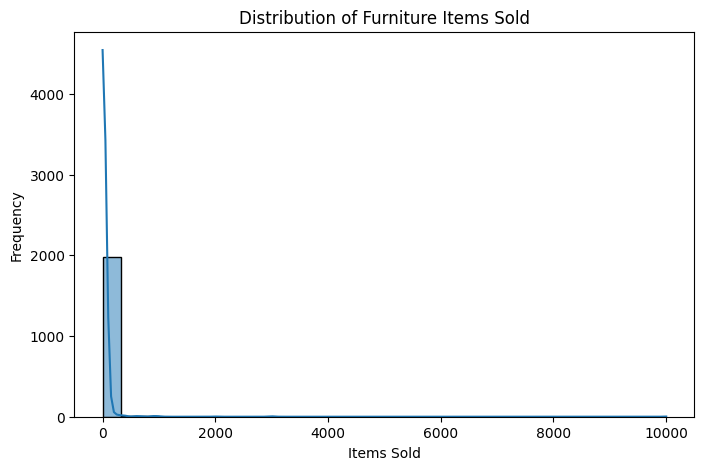

In [9]:

# 3 EDA
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['sold'], bins=30, kde=True)
plt.title('Distribution of Furniture Items Sold')
plt.xlabel('Items Sold')
plt.ylabel('Frequency')
plt.show()

print("\n" * 3)




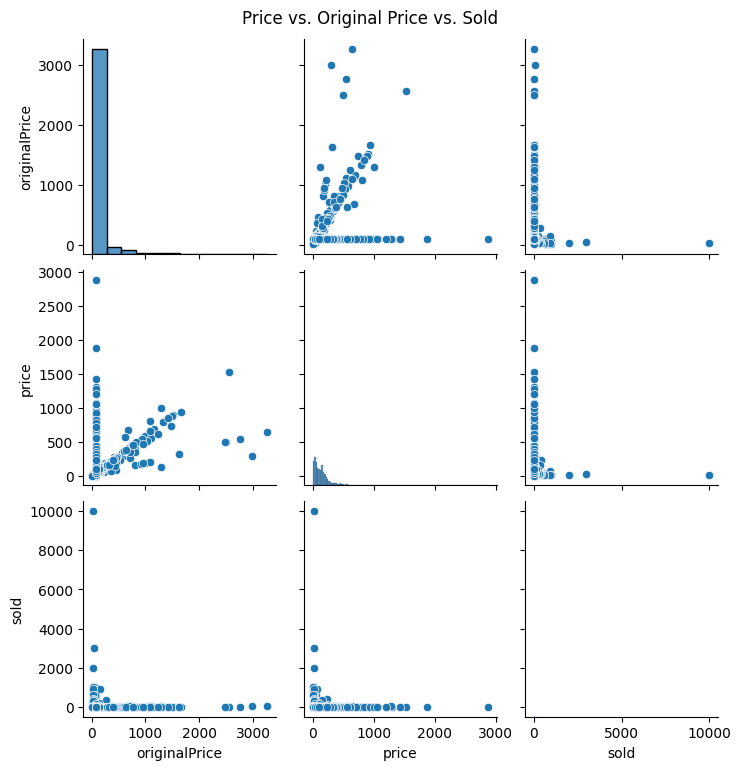

In [10]:
# Pairplot: Relationship between price, originalPrice, and sold
if all(col in df.columns for col in ['originalPrice', 'price', 'sold']):
    sns.pairplot(df[['originalPrice', 'price', 'sold']])
    plt.suptitle('Price vs. Original Price vs. Sold', y=1.02)
    plt.show()

<ipython-input-11-1c313729cba1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Shipping Type', x='Count', data=shipping_counts, palette="Blues_r")


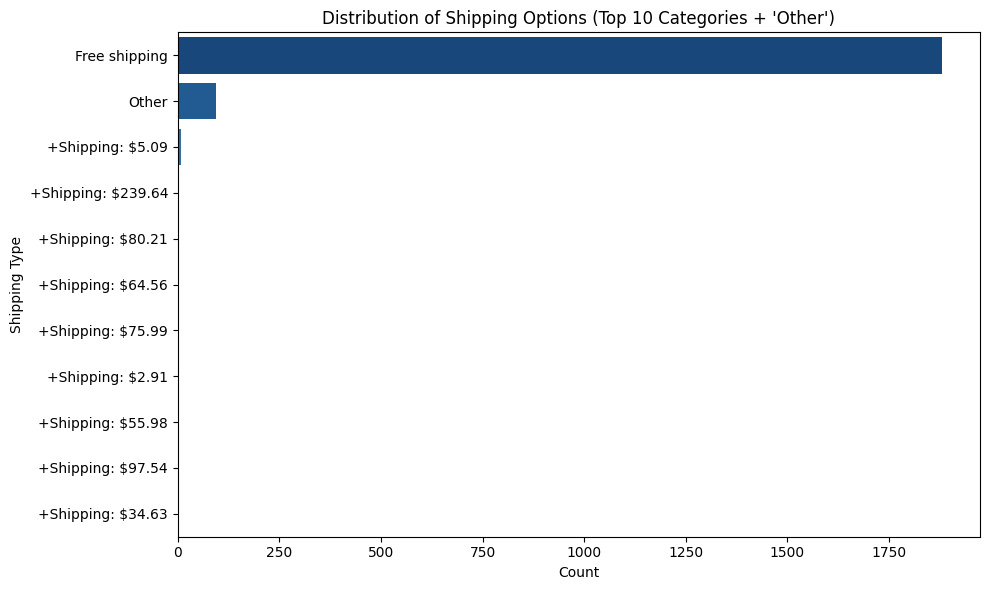

In [11]:
# 1.2 Countplot (Shipping Options) - Grouped Rare Categories
if 'tagText' in df.columns:
  top_shipping = df['tagText'].value_counts().nlargest(10).index

  df['tagText'] = df['tagText'].apply(lambda x: x if x in top_shipping else "Other")

  shipping_counts = df['tagText'].value_counts().reset_index()
  shipping_counts.columns = ['Shipping Type', 'Count']
  shipping_counts = shipping_counts.sort_values(by='Count', ascending=False)

  plt.figure(figsize=(10, 6))

#horizontal bar chart
  sns.barplot(y='Shipping Type', x='Count', data=shipping_counts, palette="Blues_r")
  plt.title("Distribution of Shipping Options (Top 10 Categories + 'Other')")
  plt.xlabel("Count")
  plt.ylabel("Shipping Type")
  plt.tight_layout()
  plt.show()

print("\n" * 3)


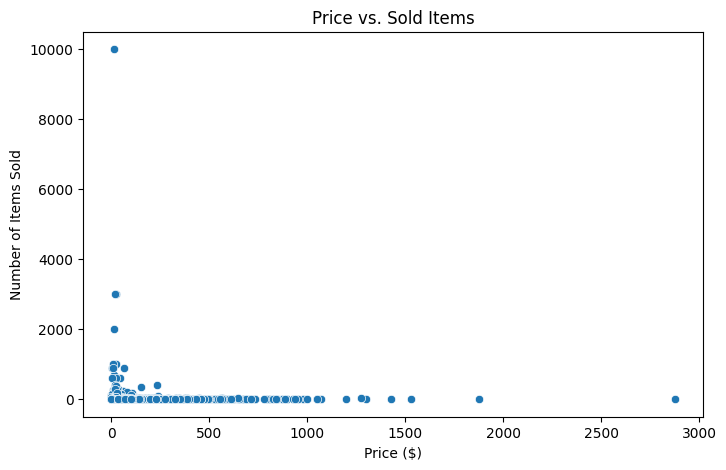

In [12]:
# 1.3 Scatterplot: Price vs Sold
if 'price' in df.columns and 'sold' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='price', y='sold', data=df)
    plt.title('Price vs. Sold Items')
    plt.xlabel("Price ($)")
    plt.ylabel("Number of Items Sold")
    plt.show()

In [16]:
# 4 Feature Engineering

# Convert productTitle to numerical features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Check if 'productTitle' exists in the dataset
if 'productTitle' in df.columns:
    # Convert 'productTitle' into a numeric feature using TF-IDF Vectorizer
    tfidf = TfidfVectorizer(max_features=100)  # Keep top 100 words
    productTitle_tfidf = tfidf.fit_transform(df['productTitle'])

    # Convert TF-IDF result to DataFrame
    productTitle_tfidf_df = pd.DataFrame(productTitle_tfidf.toarray(), columns=tfidf.get_feature_names_out())

    # Concatenate the transformed productTitle back to the original dataset
    df = pd.concat([df, productTitle_tfidf_df], axis=1)

    # Drop the original 'productTitle' column
    df = df.drop('productTitle', axis=1)

# Verify dataset again
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 105 entries, originalPrice to wooden
dtypes: float64(102), int64(1), object(2)
memory usage: 1.6+ MB
None


In [20]:
# 5 Model Selection & Training

X = df.drop('sold', axis=1)
y = df['sold']

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [23]:
# 6 MODEL EVALUATION
from sklearn.metrics import mean_squared_error, r2_score
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Update features (X) and target variable (y)
X = df_encoded.drop(columns=['sold'])  # Adjust 'sold' if your target variable is different
y = df_encoded['sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE and R²
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")

Linear Regression - MSE: 37302.51, R²: -5.80
Random Forest - MSE: 6751.90, R²: -0.23


In [24]:
# 7 CONCLUSION
if r2_rf > r2_lr:
    print("Random Forest performed better with a higher R² score.")
else:
    print("Linear Regression performed better.")

print("Further hyperparameter tuning may improve performance.")


Random Forest performed better with a higher R² score.
Further hyperparameter tuning may improve performance.
